In [1]:
import pandas as pd
import numpy as np

link = pd.read_csv('Data/links.csv') # this data is different ID of movies, will not use this data
movie = pd.read_csv('Data/movies.csv')
rating = pd.read_csv('Data/ratings.csv')
tag = pd.read_csv('Data/tags.csv')

In [2]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
tag.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


Since the userId and timestamp is not the information about movies, so they will not be used for movie clustering.

In [5]:
# remove unused features
rating = rating.drop(['userId', 'timestamp'], axis=1)
tag = tag.drop(['userId', 'timestamp'], axis=1)

The dataset of rating contains more than one rates for each movies, so I first get the average rating of each movie, and merge them with movie dataset. For the movies that do not have ratings (with Nan value), I set the rating value to 0

In [6]:
avg_rating = rating.groupby('movieId',as_index=False)['rating'].mean()

In [7]:
movie_genres = pd.merge(movie, avg_rating, how='outer',on='movieId').fillna(0)
movie_genres

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


I first created a dataset with genres, and in this dataset, movies will be clustered based on genres.

The feature genres is in string and contains multiple genres for each movie, so I then split them to seperate columns and encode them into 0 and 1.

If a movie belongs to this genres, the value is 1, otherwise 0.

In [8]:
splitGenres = movie_genres['genres'].astype('str').str.split(pat='|',expand=True)
genres = pd.get_dummies(splitGenres[0])
for i in range(1,len(splitGenres.columns)):
    temp = pd.get_dummies(splitGenres[i])
    genres = genres.combine(temp,np.fmax)

In [9]:
movie_genres = pd.concat([movie_genres, genres], axis=1, sort=False).drop('genres', axis=1)
movie_genres.to_csv('Data/movie_by_genres.csv', index=False)
movie_genres

,movieId,title,rating,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),3.920930,0,0,1,1,1,1,0,...,0,0,0.0,0,0,0,0,0,0,0
1,2,Jumanji (1995),3.431818,0,0,1,0,1,0,0,...,0,0,0.0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),3.259615,0,0,0,0,0,1,0,...,0,0,0.0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),2.357143,0,0,0,0,0,1,0,...,0,0,0.0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),3.071429,0,0,0,0,0,1,0,...,0,0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),4.000000,0,1,0,1,0,1,0,...,0,0,0.0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),3.500000,0,0,0,1,0,1,0,...,0,0,0.0,0,0,0,0,0,0,0
9739,193585,Flint (2017),3.500000,0,0,0,0,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),3.500000,0,1,0,1,0,0,0,...,0,0,0.0,0,0,0,0,0,0,0


I then created another dataset which contain the tags of each movie, and in this dataset, the movie will be clustered based on tags.

Also, since the tages is in string, so I encoded this feature to 0 and 1, value will be 1 if a movie contain this tag, otherwise 0

In [10]:
tags = pd.get_dummies(tag['tag'])
withMovieID = pd.concat([tag, tags], axis=1, sort=False).drop('tag', axis=1)
movie_tags = withMovieID.groupby('movieId',as_index=False)[tags.columns].sum()

In [11]:
movie_tags = pd.merge(movie_tags, avg_rating, how='outer', on='movieId').fillna(0)
movie_tags = pd.merge(movie_tags, movie.drop('genres',axis=1), on='movieId')
movie_tags.to_csv('Data/movie_by_tags.csv', index=False)
movie_tags

,movieId,"""artsy""",06 Oscar Nominated Best Movie - Animation,1900s,1920s,1950s,1960s,1970s,1980s,1990s,...,workplace,writing,wrongful imprisonment,wry,younger men,zither,zoe kazan,zombies,rating,title
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.920930,Toy Story (1995)
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.431818,Jumanji (1995)
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.259615,Grumpier Old Men (1995)
3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.071429,Father of the Bride Part II (1995)
4,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.185185,Sabrina (1995)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,Black Butler: Book of the Atlantic (2017)
9738,193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.500000,No Game No Life: Zero (2017)
9739,193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.500000,Flint (2017)
9740,193587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.500000,Bungo Stray Dogs: Dead Apple (2018)


Then I start to cluster the movies.

I first tried a cluster model with k-means, to choose an appropriate number of clusters, I used elbow method. 

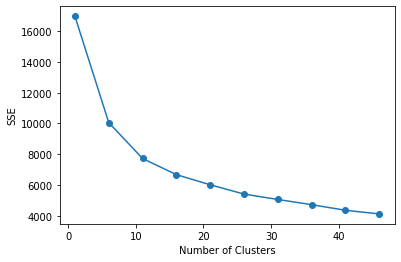

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

feature_genres = movie_genres.drop(['movieId', 'title', 'rating'],axis=1)
sse = []
for k in range(1,50,5):
    kmeans = KMeans(n_clusters=k).fit(feature_genres)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,50,5), sse,'o-')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Get the elbow value by using KneeLocator

In [14]:
from kneed import KneeLocator

kl = KneeLocator(range(1,50,5), sse, curve="convex", direction="decreasing")
kl.elbow

11

In [15]:
kmeans_genres = KMeans(n_clusters=11).fit_predict(feature_genres)
movie_genres['Cluster'] = kmeans_genres
movie_genres.head()

,movieId,title,rating,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Cluster
0,1,Toy Story (1995),3.920930,0,0,1,1,1,1,0,...,0,0.0,0,0,0,0,0,0,0,9
1,2,Jumanji (1995),3.431818,0,0,1,0,1,0,0,...,0,0.0,0,0,0,0,0,0,0,3
2,3,Grumpier Old Men (1995),3.259615,0,0,0,0,0,1,0,...,0,0.0,0,0,1,0,0,0,0,1
3,4,Waiting to Exhale (1995),2.357143,0,0,0,0,0,1,0,...,0,0.0,0,0,1,0,0,0,0,1
4,5,Father of the Bride Part II (1995),3.071429,0,0,0,0,0,1,0,...,0,0.0,0,0,0,0,0,0,0,7


After the clustering, I have a function to return the movies with same cluster label, and then sort these movies by rating, so this function will return the top few similiar movies

In [16]:
def similiarMoviesGenres(Title, number_movies):
    row_index = movie_genres.index[movie_genres['title'] == Title]
    cluster_number = movie_genres.loc[row_index]['Cluster'].values[0]
    moviesByGenres = movie_genres.loc[movie_genres['Cluster'] == cluster_number]
    moviesByGenres = moviesByGenres.sort_values(by=['rating'],ascending=False)  # sort the movies by rating
    top_similiar_movies = pd.DataFrame(moviesByGenres['title'].values).head(number_movies)
    return top_similiar_movies

similiarMoviesGenres('Toy Story (1995)',10)

,0
0,Nasu: Summer in Andalusia (2003)
1,Investigation Held by Kolobki (1986)
2,There Once Was a Dog (1982)
3,Big Top Scooby-Doo! (2012)
4,Babes in Toyland (1934)
5,Garfield's Pet Force (2009)
6,A Plasticine Crow (1981)
7,Scooby-Doo! Abracadabra-Doo (2010)
8,Stuart Little 3: Call of the Wild (2005)
9,Junior and Karlson (1968)


In [17]:
similiarMoviesGenres('The Love Bug (1997)',10)

,0
0,The Love Bug (1997)
1,"Monster Squad, The (1987)"
2,12 Chairs (1976)
3,Palindromes (2004)
4,Scooby-Doo! Curse of the Lake Monster (2010)
5,Return to Treasure Island (1988)
6,Priklyucheniya Kapitana Vrungelya (1979)
7,Dragons: Gift of the Night Fury (2011)
8,Into the Woods (1991)
9,Journey to the West: Conquering the Demons (Da...


In [18]:
similiarMoviesGenres('Flint (2017)',10)

,0
0,Reform School Girls (1986)
1,The Bremen Town Musicians (1969)
2,Eichmann (2007)
3,Entertaining Angels: The Dorothy Day Story (1996)
4,Max Manus (2008)
5,Enter the Void (2009)
6,Madame Sousatzka (1988)
7,Idiots and Angels (2008)
8,Moonlight
9,Satin Rouge (2002)


Then I cluster the movies by tages with k-means

First, find the appropriate number of clusters

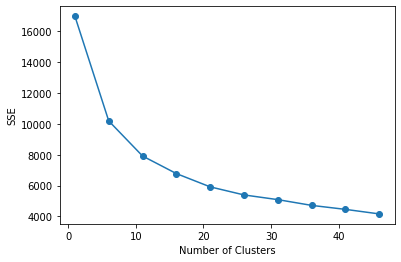

In [19]:
feature_tags = movie_tags.drop(['movieId','title', 'rating'],axis=1)
sse = []
for k in range(1,50,5):
    kmeans = KMeans(n_clusters=k).fit(feature_genres)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,50,5), sse,'o-')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [20]:
kl_2 = KneeLocator(range(1,50,5), sse, curve="convex", direction="decreasing")
kl_2.elbow

11

In [21]:
kmeans_tags = KMeans(n_clusters=11).fit_predict(feature_tags)
movie_tags['Cluster'] = kmeans_tags
movie_tags.head()

,movieId,"""artsy""",06 Oscar Nominated Best Movie - Animation,1900s,1920s,1950s,1960s,1970s,1980s,1990s,...,writing,wrongful imprisonment,wry,younger men,zither,zoe kazan,zombies,rating,title,Cluster
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.920930,Toy Story (1995),0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.431818,Jumanji (1995),0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.259615,Grumpier Old Men (1995),0
3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.071429,Father of the Bride Part II (1995),0
4,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.185185,Sabrina (1995),0


In [22]:
def similiarMoviesTags(Title, number_movies):
    row_index = movie_tags.index[movie_tags['title'] == Title]
    cluster_number = movie_tags.loc[row_index]['Cluster'].values[0]
    moviesByTags = movie_tags.loc[movie_tags['Cluster'] == cluster_number]
    moviesByTags = moviesByTags.sort_values(by=['rating'],ascending=False) # sort the movies by rating
    top_similiar_movies = pd.DataFrame(moviesByTags['title'].values).head(number_movies)
    return top_similiar_movies

similiarMoviesTags('Toy Story (1995)',10)

,0
0,"Thousand Clowns, A (1965)"
1,Tom Segura: Mostly Stories (2016)
2,Scooby-Doo Goes Hollywood (1979)
3,Big Top Scooby-Doo! (2012)
4,Who Killed Chea Vichea? (2010)
5,"Chump at Oxford, A (1940)"
6,On the Ropes (1999)
7,Scooby-Doo! and the Loch Ness Monster (2004)
8,Scooby-Doo! and the Samurai Sword (2009)
9,Continental Divide (1981)


In [23]:
similiarMoviesTags('Donnie Darko (2001)',10)

,0
0,Eternal Sunshine of the Spotless Mind (2004)
1,Inception (2010)
2,Donnie Darko (2001)


In [24]:
similiarMoviesTags('Ooops! Noah is Gone... (2015)',10)

,0
0,"Thousand Clowns, A (1965)"
1,Tom Segura: Mostly Stories (2016)
2,Scooby-Doo Goes Hollywood (1979)
3,Big Top Scooby-Doo! (2012)
4,Who Killed Chea Vichea? (2010)
5,"Chump at Oxford, A (1940)"
6,On the Ropes (1999)
7,Scooby-Doo! and the Loch Ness Monster (2004)
8,Scooby-Doo! and the Samurai Sword (2009)
9,Continental Divide (1981)


After K-means, I then tried a clustering model with DBSCAN. I first try to use knn distance to find the appropriate value for eps, and I found the following code from:https://www.thetopsites.net/article/50575374.shtml 

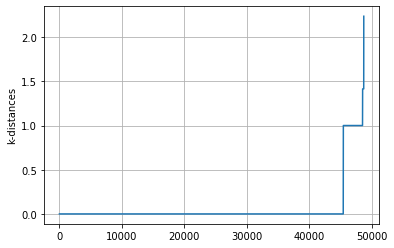

In [25]:
def k_distances2(x, k):
    dim0 = x.shape[0]
    dim1 = x.shape[1]
    p=-2*x.dot(x.T)+np.sum(x**2, axis=1).T+ np.repeat(np.sum(x**2, axis=1),dim0,axis=0).reshape(dim0,dim0)
    p = np.sqrt(p)
    p.sort(axis=1)
    p=p[:,:k]
    pm= p.flatten()
    pm= np.sort(pm)
    return p, pm
m, m2= k_distances2(np.array(feature_genres), 5)
plt.plot(m2)
plt.ylabel("k-distances")
plt.grid(True)
plt.show()

The distance plot for this dataset is looks strange, but it somewhat shows the elbow value between 0 and 1, and I decide to choose the middle point 0.5

In [26]:
from sklearn.cluster import DBSCAN
db_genres = DBSCAN(eps=0.5).fit_predict(feature_genres)
movie_genres['Cluster_DBSCAN'] = db_genres
movie_genres.head()

,movieId,title,rating,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Cluster,Cluster_DBSCAN
0,1,Toy Story (1995),3.920930,0,0,1,1,1,1,0,...,0.0,0,0,0,0,0,0,0,9,0
1,2,Jumanji (1995),3.431818,0,0,1,0,1,0,0,...,0.0,0,0,0,0,0,0,0,3,1
2,3,Grumpier Old Men (1995),3.259615,0,0,0,0,0,1,0,...,0.0,0,0,1,0,0,0,0,1,2
3,4,Waiting to Exhale (1995),2.357143,0,0,0,0,0,1,0,...,0.0,0,0,1,0,0,0,0,1,3
4,5,Father of the Bride Part II (1995),3.071429,0,0,0,0,0,1,0,...,0.0,0,0,0,0,0,0,0,7,4


In [27]:
def similiarMoviesGenres_DBSCAN(Title, number_movies):
    row_index = movie_genres.index[movie_genres['title'] == Title]
    cluster_number = movie_genres.loc[row_index]['Cluster_DBSCAN'].values[0]
    moviesByGenres = movie_genres.loc[movie_genres['Cluster_DBSCAN'] == cluster_number]
    moviesByGenres = moviesByGenres.sort_values(by=['rating'],ascending=False)  # sort the movies by rating
    top_similiar_movies = pd.DataFrame(moviesByGenres['title'].values).head(number_movies)
    return top_similiar_movies

similiarMoviesGenres_DBSCAN('Toy Story (1995)',10)

,0
0,Asterix and the Vikings (Astérix et les Viking...
1,Toy Story (1995)
2,"Monsters, Inc. (2001)"
3,Toy Story 2 (1999)
4,"Emperor's New Groove, The (2000)"
5,Moana (2016)
6,Antz (1998)
7,Shrek the Third (2007)
8,"Tale of Despereaux, The (2008)"
9,The Good Dinosaur (2015)


In [28]:
similiarMoviesGenres_DBSCAN('The Love Bug (1997)',10)

,0
0,The Love Bug (1997)
1,Casper Meets Wendy (1998)
2,Asterix & Obelix vs. Caesar (Astérix et Obélix...
3,Asterix at the Olympic Games (Astérix aux jeux...
4,Halloweentown High (2004)
5,Night at the Museum: Secret of the Tomb (2014)
6,Halloweentown (1998)
7,Lemony Snicket's A Series of Unfortunate Event...
8,"Borrowers, The (1997)"
9,"Shaggy Dog, The (2006)"


In [29]:
similiarMoviesGenres_DBSCAN('Flint (2017)',10)

,0
0,"Man with the Golden Arm, The (1955)"
1,"Marriage of Maria Braun, The (Ehe der Maria Br..."
2,"Passenger, The (Professione: reporter) (1975)"
3,"Five Senses, The (1999)"
4,"Story of Women (Affaire de femmes, Une) (1988)"
5,Umberto D. (1952)
6,Two Family House (2000)
7,61* (2001)
8,Indignation (2016)
9,Moonlight


Then also cluster the movies by tags

First find the eps value for this dataset.

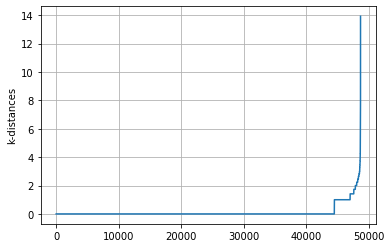

In [30]:
m, m2= k_distances2(np.array(feature_tags), 5)
plt.plot(m2)
plt.ylabel("k-distances")
plt.grid(True)
plt.show()

As shown in the figure, the elbow value is 2, so the eps for this dataset is 2

In [31]:
db_tags = DBSCAN(eps=2).fit_predict(feature_tags)
movie_tags['Cluster_DBSCAN'] = db_tags

In [32]:
def similiarMoviesTags_DBSCAN(Title, number_movies):
    row_index = movie_tags.index[movie_tags['title'] == Title]
    cluster_number = movie_tags.loc[row_index]['Cluster_DBSCAN'].values[0]
    moviesByTags = movie_tags.loc[movie_tags['Cluster_DBSCAN'] == cluster_number]
    moviesByTags = moviesByTags.sort_values(by=['rating'],ascending=False)  # sort the movies by rating
    top_similiar_movies = pd.DataFrame(moviesByTags['title'].values).head(number_movies)
    return top_similiar_movies

similiarMoviesTags_DBSCAN('Toy Story (1995)',10)

,0
0,I'm the One That I Want (2000)
1,"Ugly Duckling and Me!, The (2006)"
2,Duel in the Sun (1946)
3,"Five Senses, The (1999)"
4,Mickey's Once Upon a Christmas (1999)
5,"One I Love, The (2014)"
6,Scooby-Doo! Curse of the Lake Monster (2010)
7,Love Exposure (Ai No Mukidashi) (2008)
8,"Nine Lives of Tomas Katz, The (2000)"
9,Peaceful Warrior (2006)


In [33]:
similiarMoviesTags_DBSCAN('Donnie Darko (2001)',10)

,0
0,More (1998)
1,Come and See (Idi i smotri) (1985)
2,Captain Fantastic (2016)
3,Funny Games U.S. (2007)
4,Frank (2014)
5,"Brothers Bloom, The (2008)"
6,Inside Job (2010)
7,Fight Club (1999)
8,Dr. Strangelove or: How I Learned to Stop Worr...
9,Rear Window (1954)


In [34]:
similiarMoviesTags_DBSCAN('Ooops! Noah is Gone... (2015)',10)

,0
0,I'm the One That I Want (2000)
1,"Ugly Duckling and Me!, The (2006)"
2,Duel in the Sun (1946)
3,"Five Senses, The (1999)"
4,Mickey's Once Upon a Christmas (1999)
5,"One I Love, The (2014)"
6,Scooby-Doo! Curse of the Lake Monster (2010)
7,Love Exposure (Ai No Mukidashi) (2008)
8,"Nine Lives of Tomas Katz, The (2000)"
9,Peaceful Warrior (2006)


I also created a Agglomerative clustering model, the number of clusters is the same number with K-means. 

In [35]:
from sklearn.cluster import AgglomerativeClustering

agg_genres = AgglomerativeClustering(n_clusters=11).fit_predict(feature_genres)
movie_genres['Cluster_agg'] = agg_genres

def similiarMoviesGenres_agg(Title, number_movies):
    row_index = movie_genres.index[movie_genres['title'] == Title]
    cluster_number = movie_genres.loc[row_index]['Cluster_agg'].values[0]
    moviesByGenres = movie_genres.loc[movie_genres['Cluster_agg'] == cluster_number]
    moviesByGenres = moviesByGenres.sort_values(by=['rating'],ascending=False)  # sort the movies by rating
    top_similiar_movies = pd.DataFrame(moviesByGenres['title'].values).head(number_movies)
    return top_similiar_movies

similiarMoviesGenres_agg('Toy Story (1995)',10)

,0
0,Idiots and Angels (2008)
1,Asterix and the Vikings (Astérix et les Viking...
2,Presto (2008)
3,Three from Prostokvashino (1978)
4,Ice Age: The Great Egg-Scapade (2016)
5,Tenchi Muyô! In Love (1996)
6,The Bremen Town Musicians (1969)
7,Winnie Pooh (1969)
8,Winnie the Pooh Goes Visiting (1971)
9,Lesson Faust (1994)


In [36]:
similiarMoviesGenres_agg('The Love Bug (1997)',10)

,0
0,Trinity and Sartana Are Coming (1972)
1,"Very Potter Sequel, A (2010)"
2,Babes in Toyland (1934)
3,"Odd Life of Timothy Green, The (2012)"
4,Duel in the Sun (1946)
5,The Love Bug (1997)
6,Willy/Milly (1986)
7,My Left Eye Sees Ghosts (Ngo joh aan gin diy g...
8,7 Faces of Dr. Lao (1964)
9,"Nine Lives of Tomas Katz, The (2000)"


In [37]:
agg_tags = AgglomerativeClustering(n_clusters=11).fit_predict(feature_tags)
movie_tags['Cluster_agg'] = agg_tags

def similiarMoviesTags_agg(Title, number_movies):
    row_index = movie_tags.index[movie_tags['title'] == Title]
    cluster_number = movie_tags.loc[row_index]['Cluster_agg'].values[0]
    moviesByTags = movie_tags.loc[movie_tags['Cluster_agg'] == cluster_number]
    moviesByTags = moviesByTags.sort_values(by=['rating'],ascending=False)  # sort the movies by rating
    top_similiar_movies = pd.DataFrame(moviesByTags['title'].values).head(number_movies)
    return top_similiar_movies

similiarMoviesTags_agg('Toy Story (1995)',10)

,0
0,Branded to Kill (Koroshi no rakuin) (1967)
1,A Perfect Day (2015)
2,The Adventures of Sherlock Holmes and Doctor W...
3,"Sandpiper, The (1965)"
4,The Adventures of Sherlock Holmes and Doctor W...
5,Adventures Of Sherlock Holmes And Dr. Watson: ...
6,The Adventures of Sherlock Holmes and Doctor W...
7,The Adventures of Sherlock Holmes and Dr. Wats...
8,Scooby-Doo! Curse of the Lake Monster (2010)
9,Sherlock Holmes and Dr. Watson: Acquaintance (...


In [38]:
similiarMoviesTags_agg('Donnie Darko (2001)',10)

,0
0,Inception (2010)
1,Donnie Darko (2001)
